In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
base_dir = "/content/drive/MyDrive/Bone Cancer Detection Dataset"
train_dir = "/content/drive/MyDrive/Bone Cancer Detection Dataset/train"
val_dir = "/content/drive/MyDrive/Bone Cancer Detection Dataset/valid"
test_dir = "/content/drive/MyDrive/Bone Cancer Detection Dataset/test"

In [4]:
import pandas as pd
import os

data_dir =base_dir # المجلد الأساسي
subsets = ['train', 'valid', 'test']  # أسماء المجلدات الفرعية

dfs = {}  # لتخزين الـ DataFrames في قاموس

for subset in subsets:
    csv_path = os.path.join(data_dir, subset, '_classes.csv')  # مسار ملف CSV داخل المجلد
    if os.path.exists(csv_path):  # تأكد أن الملف موجود
        df = pd.read_csv(csv_path)
        dfs[subset] = df  # تخزين DataFrame في القاموس
        print(f"{subset} ✅ -> تم تحميل {len(df)} صفاً")
    else:
        print(f"{subset} ❌ -> لم يتم العثور على {csv_path}")

train ✅ -> تم تحميل 7057 صفاً
valid ✅ -> تم تحميل 882 صفاً
test ✅ -> تم تحميل 872 صفاً


In [5]:
train_df = dfs['train']
valid_df = dfs['valid']
test_df = dfs['test']

# مثال: عرض أول صفين من بيانات التحقق
print('Rows from train \n')
print(train_df.head())
print('--------------------------------------------------')
print('Rows from valid \n')
print(valid_df.head())
print('--------------------------------------------------')
print('Rows from test \n')
print(test_df.head())

Rows from train 

                                            filename   cancer   normal
0        53-_jpg.rf.08d303d0b43c7b71c3581ec02d7390c3        0        1
1  image-no531-normal-_png.rf.08eeb57b24a9062d798...        0        1
2  IMG0000240_jpg.rf.094924a72ca1ab5e26477e50abac...        0        1
3  bone-cancer_train_2_821_png.rf.094c60132af2cb3...        1        0
4  image-no52-normal-_png.rf.08f33a992911794d2381...        0        1
--------------------------------------------------
Rows from valid 

                                            filename   cancer   normal
0  177_JPG_jpg.rf.016b13419907ef52e805cde43d35225...        1        0
1  IMG0000345_jpg.rf.006fa65fdaa1df5d6287aefdf9ef...        0        1
2  foot_35_1_png.rf.006b991a599ebee5cc6d7bd8678bb...        0        1
3  IMG0000291_jpg.rf.017794ae2367a87da945a33c8fa6...        0        1
4  IMG0000833_jpg.rf.02e4f31bc0df6ad5663194c15508...        0        1
--------------------------------------------------
Rows from 

In [6]:
# تنظيف وتطبيق التحويل على كل من train_df, valid_df, test_df

for name, df in [('train', train_df), ('valid', valid_df), ('test', test_df)]:
    # تنظيف أسماء الأعمدة من المسافات الزائدة
    df.columns = df.columns.str.strip()

    # التأكد من وجود الأعمدة المطلوبة
    if 'cancer' in df.columns and 'normal' in df.columns:
        df['label'] = df[['cancer', 'normal']].idxmax(axis=1)
        print(f" تم إنشاء عمود 'label' في {name}_df")
    else:
        print(f" الأعمدة 'cancer' و 'normal' غير موجودة في {name}_df")

# معاينة أول 5 صفوف من كل DataFrame بعد التحويل
print("\nTrain:")
print(train_df[['filename', 'label']].head())
print("\nvalid:")
print(valid_df[['filename', 'label']].head())
print("\nTest:")
print(test_df[['filename', 'label']].head())

 تم إنشاء عمود 'label' في train_df
 تم إنشاء عمود 'label' في valid_df
 تم إنشاء عمود 'label' في test_df

Train:
                                            filename   label
0        53-_jpg.rf.08d303d0b43c7b71c3581ec02d7390c3  normal
1  image-no531-normal-_png.rf.08eeb57b24a9062d798...  normal
2  IMG0000240_jpg.rf.094924a72ca1ab5e26477e50abac...  normal
3  bone-cancer_train_2_821_png.rf.094c60132af2cb3...  cancer
4  image-no52-normal-_png.rf.08f33a992911794d2381...  normal

valid:
                                            filename   label
0  177_JPG_jpg.rf.016b13419907ef52e805cde43d35225...  cancer
1  IMG0000345_jpg.rf.006fa65fdaa1df5d6287aefdf9ef...  normal
2  foot_35_1_png.rf.006b991a599ebee5cc6d7bd8678bb...  normal
3  IMG0000291_jpg.rf.017794ae2367a87da945a33c8fa6...  normal
4  IMG0000833_jpg.rf.02e4f31bc0df6ad5663194c15508...  normal

Test:
                                            filename   label
0  Picture6_jpg.rf.034f47366f61e0cbec31d48d7b4167...  normal
1  IMG0000041_jpg.r

In [7]:
print(f" عدد الصور في مجموعة التدريب: {len(train_df)}")
print(f" عدد الصور في مجموعة التحقق: {len(valid_df)}")
print(f" عدد الصور في مجموعة الاختبار: {len(test_df)}")

 عدد الصور في مجموعة التدريب: 7057
 عدد الصور في مجموعة التحقق: 882
 عدد الصور في مجموعة الاختبار: 872


In [8]:
# توزيع الفئات في كل مجموعة
for name, df in [('train', train_df), ('valid', valid_df), ('test', test_df)]:
    print(f"\n توزيع الفئات في مجموعة {name.upper()}:")
    print(df['label'].value_counts())


 توزيع الفئات في مجموعة TRAIN:
label
normal    3976
cancer    3081
Name: count, dtype: int64

 توزيع الفئات في مجموعة VALID:
label
normal    484
cancer    398
Name: count, dtype: int64

 توزيع الفئات في مجموعة TEST:
label
normal    488
cancer    384
Name: count, dtype: int64


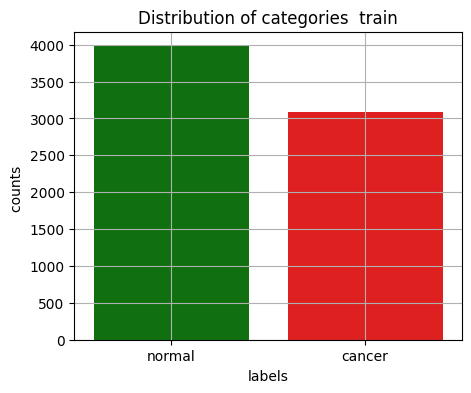

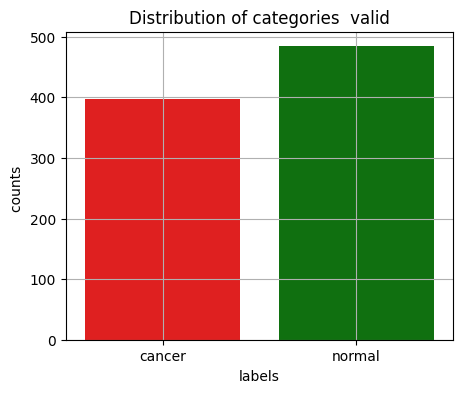

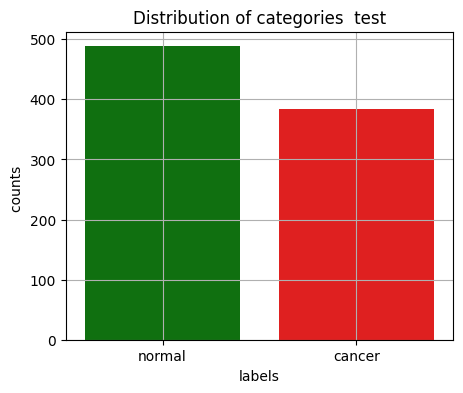

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# دالة لرسم التوزيع لكل مجموعة
def plot_label_distribution(df, title):
    plt.figure(figsize=(5,4))
    palette = {'cancer': 'red', 'normal': 'green'}
    sns.countplot(data=df, x='label', palette=palette)
    plt.title(f"Distribution of categories  {title}")
    plt.xlabel("labels")
    plt.ylabel("counts ")
    plt.grid(True)
    plt.show()

# الرسم لكل مجموعة
plot_label_distribution(train_df, "train")
plot_label_distribution(valid_df, "valid")
plot_label_distribution(test_df, "test")

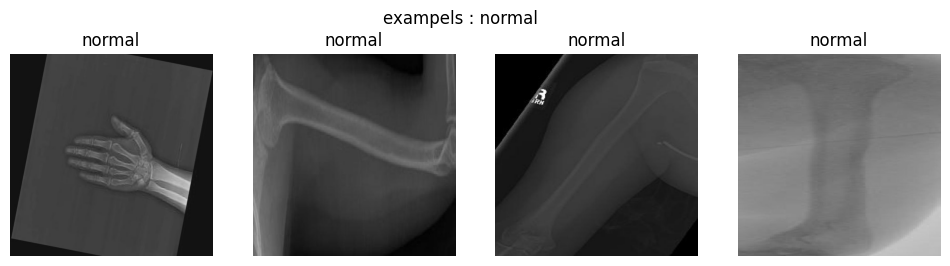

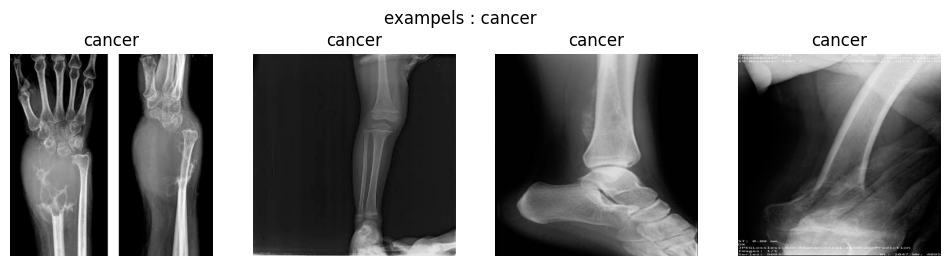

In [10]:
import os
from PIL import Image

# مسار الصور
image_base_path = train_dir

# عرض بعض الصور لكل فئة
def show_sample_images(df, base_path, label_name, n=4):
    subset = df[df['label'] == label_name].sample(n=n)
    plt.figure(figsize=(12, 3))
    for i, filename in enumerate(subset['filename']):
        img_path = os.path.join(base_path, filename)
        img = Image.open(img_path)
        plt.subplot(1, n, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(label_name)
        plt.axis('off')
    plt.suptitle(f"exampels : {label_name}")
    plt.show()

# عرض عينات من كل فئة
for label in train_df['label'].unique():
    show_sample_images(train_df, image_base_path, label)


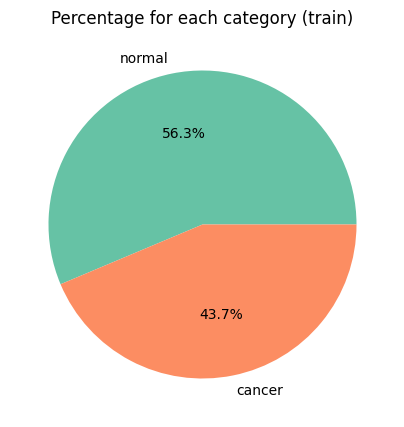

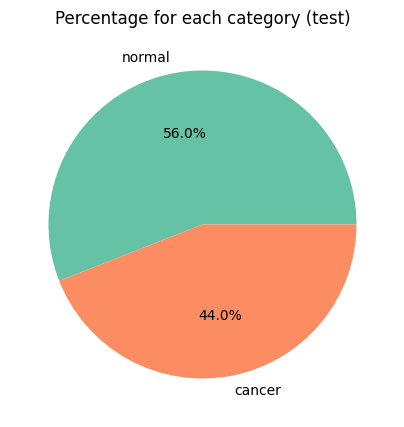

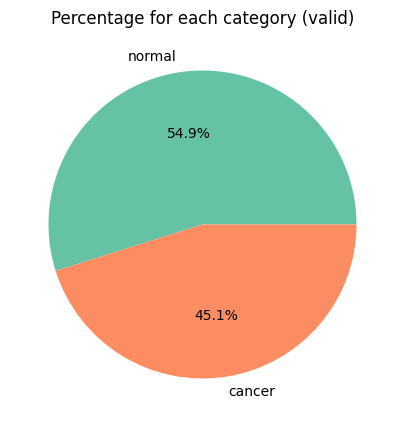

In [11]:
def plot_pie_chart(df, title):
    counts = df['label'].value_counts()
    plt.figure(figsize=(5,5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    plt.title(f"Percentage for each category ({title})")
    plt.show()

plot_pie_chart(train_df, "train")
plot_pie_chart(test_df, "test")
plot_pie_chart(valid_df, "valid")

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size=32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [13]:
"""train_generator = datagen.flow_from_dataframe(
    dataframe=dfs['train'],
    directory=os.path.join(data_dir, 'train'),  # مسار المجلد الذي يحتوي على الصور
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    batch_size=32,
    shuffle=True
)"""
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    classes=['normal', 'cancer']  # هنا ترتيب الفئات
)
print(train_generator.class_indices)

Found 7018 validated image filenames belonging to 2 classes.
{'normal': 0, 'cancer': 1}


In [14]:
val_generator = datagen.flow_from_dataframe(
    dataframe=dfs['valid'],
    directory=os.path.join(data_dir, 'valid'),
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False,
    classes=['normal', 'cancer']  #  هنا ترتيب الفئات
)
print(val_generator.class_indices)

Found 882 validated image filenames belonging to 2 classes.
{'normal': 0, 'cancer': 1}


In [15]:
test_generator = datagen.flow_from_dataframe(
    dataframe=dfs['test'],
    directory=os.path.join(data_dir, 'test'),
    x_col='filename',
    y_col='label',
    target_size=img_size,
    class_mode='binary',
    batch_size=batch_size,
    shuffle=False,
    classes=['normal', 'cancer']  # هنا ترتيب الفئات
)
print(test_generator.class_indices)

Found 872 validated image filenames belonging to 2 classes.
{'normal': 0, 'cancer': 1}


In [16]:
label_mapping = {'normal': 0, 'cancer': 1}
# تعريف القيم التي سيتم التحويل منها إلى أرقام
# تحويل التصنيف النصي إلى رقم
train_df['label'] = train_df['label'].map(label_mapping)
valid_df['label'] = valid_df['label'].map(label_mapping)
test_df['label'] = test_df['label'].map(label_mapping)

print(train_df[['filename', 'label']].head())
print(valid_df[['filename', 'label']].head())
print(test_df[['filename', 'label']].head())

                                            filename  label
0        53-_jpg.rf.08d303d0b43c7b71c3581ec02d7390c3      0
1  image-no531-normal-_png.rf.08eeb57b24a9062d798...      0
2  IMG0000240_jpg.rf.094924a72ca1ab5e26477e50abac...      0
3  bone-cancer_train_2_821_png.rf.094c60132af2cb3...      1
4  image-no52-normal-_png.rf.08f33a992911794d2381...      0
                                            filename  label
0  177_JPG_jpg.rf.016b13419907ef52e805cde43d35225...      1
1  IMG0000345_jpg.rf.006fa65fdaa1df5d6287aefdf9ef...      0
2  foot_35_1_png.rf.006b991a599ebee5cc6d7bd8678bb...      0
3  IMG0000291_jpg.rf.017794ae2367a87da945a33c8fa6...      0
4  IMG0000833_jpg.rf.02e4f31bc0df6ad5663194c15508...      0
                                            filename  label
0  Picture6_jpg.rf.034f47366f61e0cbec31d48d7b4167...      0
1  IMG0000041_jpg.rf.0707545fd366027c4732ccf7bbe3...      0
2  bone-cancer_train_2_1674_png.rf.08de2e2c775f6f...      1
3  bone-cancer_train_2_1873_png.rf.05b25

In [17]:
print("Train labels:", train_df['label'].unique())
print("Valid labels:", valid_df['label'].unique())
print("Test labels:", test_df['label'].unique())

Train labels: [0 1]
Valid labels: [1 0]
Test labels: [0 1]


In [18]:
# عرض عدد القيم المفقودة في كل عمود من كل ملف
print(" Missing values in train_df:")
print(train_df.isnull().sum())
print("\n Missing values in valid_df:")
print(valid_df.isnull().sum())
print("\n Missing values in test_df:")
print(test_df.isnull().sum())

 Missing values in train_df:
filename    0
cancer      0
normal      0
label       0
dtype: int64

 Missing values in valid_df:
filename    0
cancer      0
normal      0
label       0
dtype: int64

 Missing values in test_df:
filename    0
cancer      0
normal      0
label       0
dtype: int64


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
"""model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])"""

"model = Sequential([\n    Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),\n    MaxPooling2D(),\n    Conv2D(64, (3,3), activation='relu'),\n    MaxPooling2D(),\n    Flatten(),\n    Dense(256, activation='relu'),\n    Dropout(0.5),\n    Dense(1, activation='sigmoid')\n])"

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

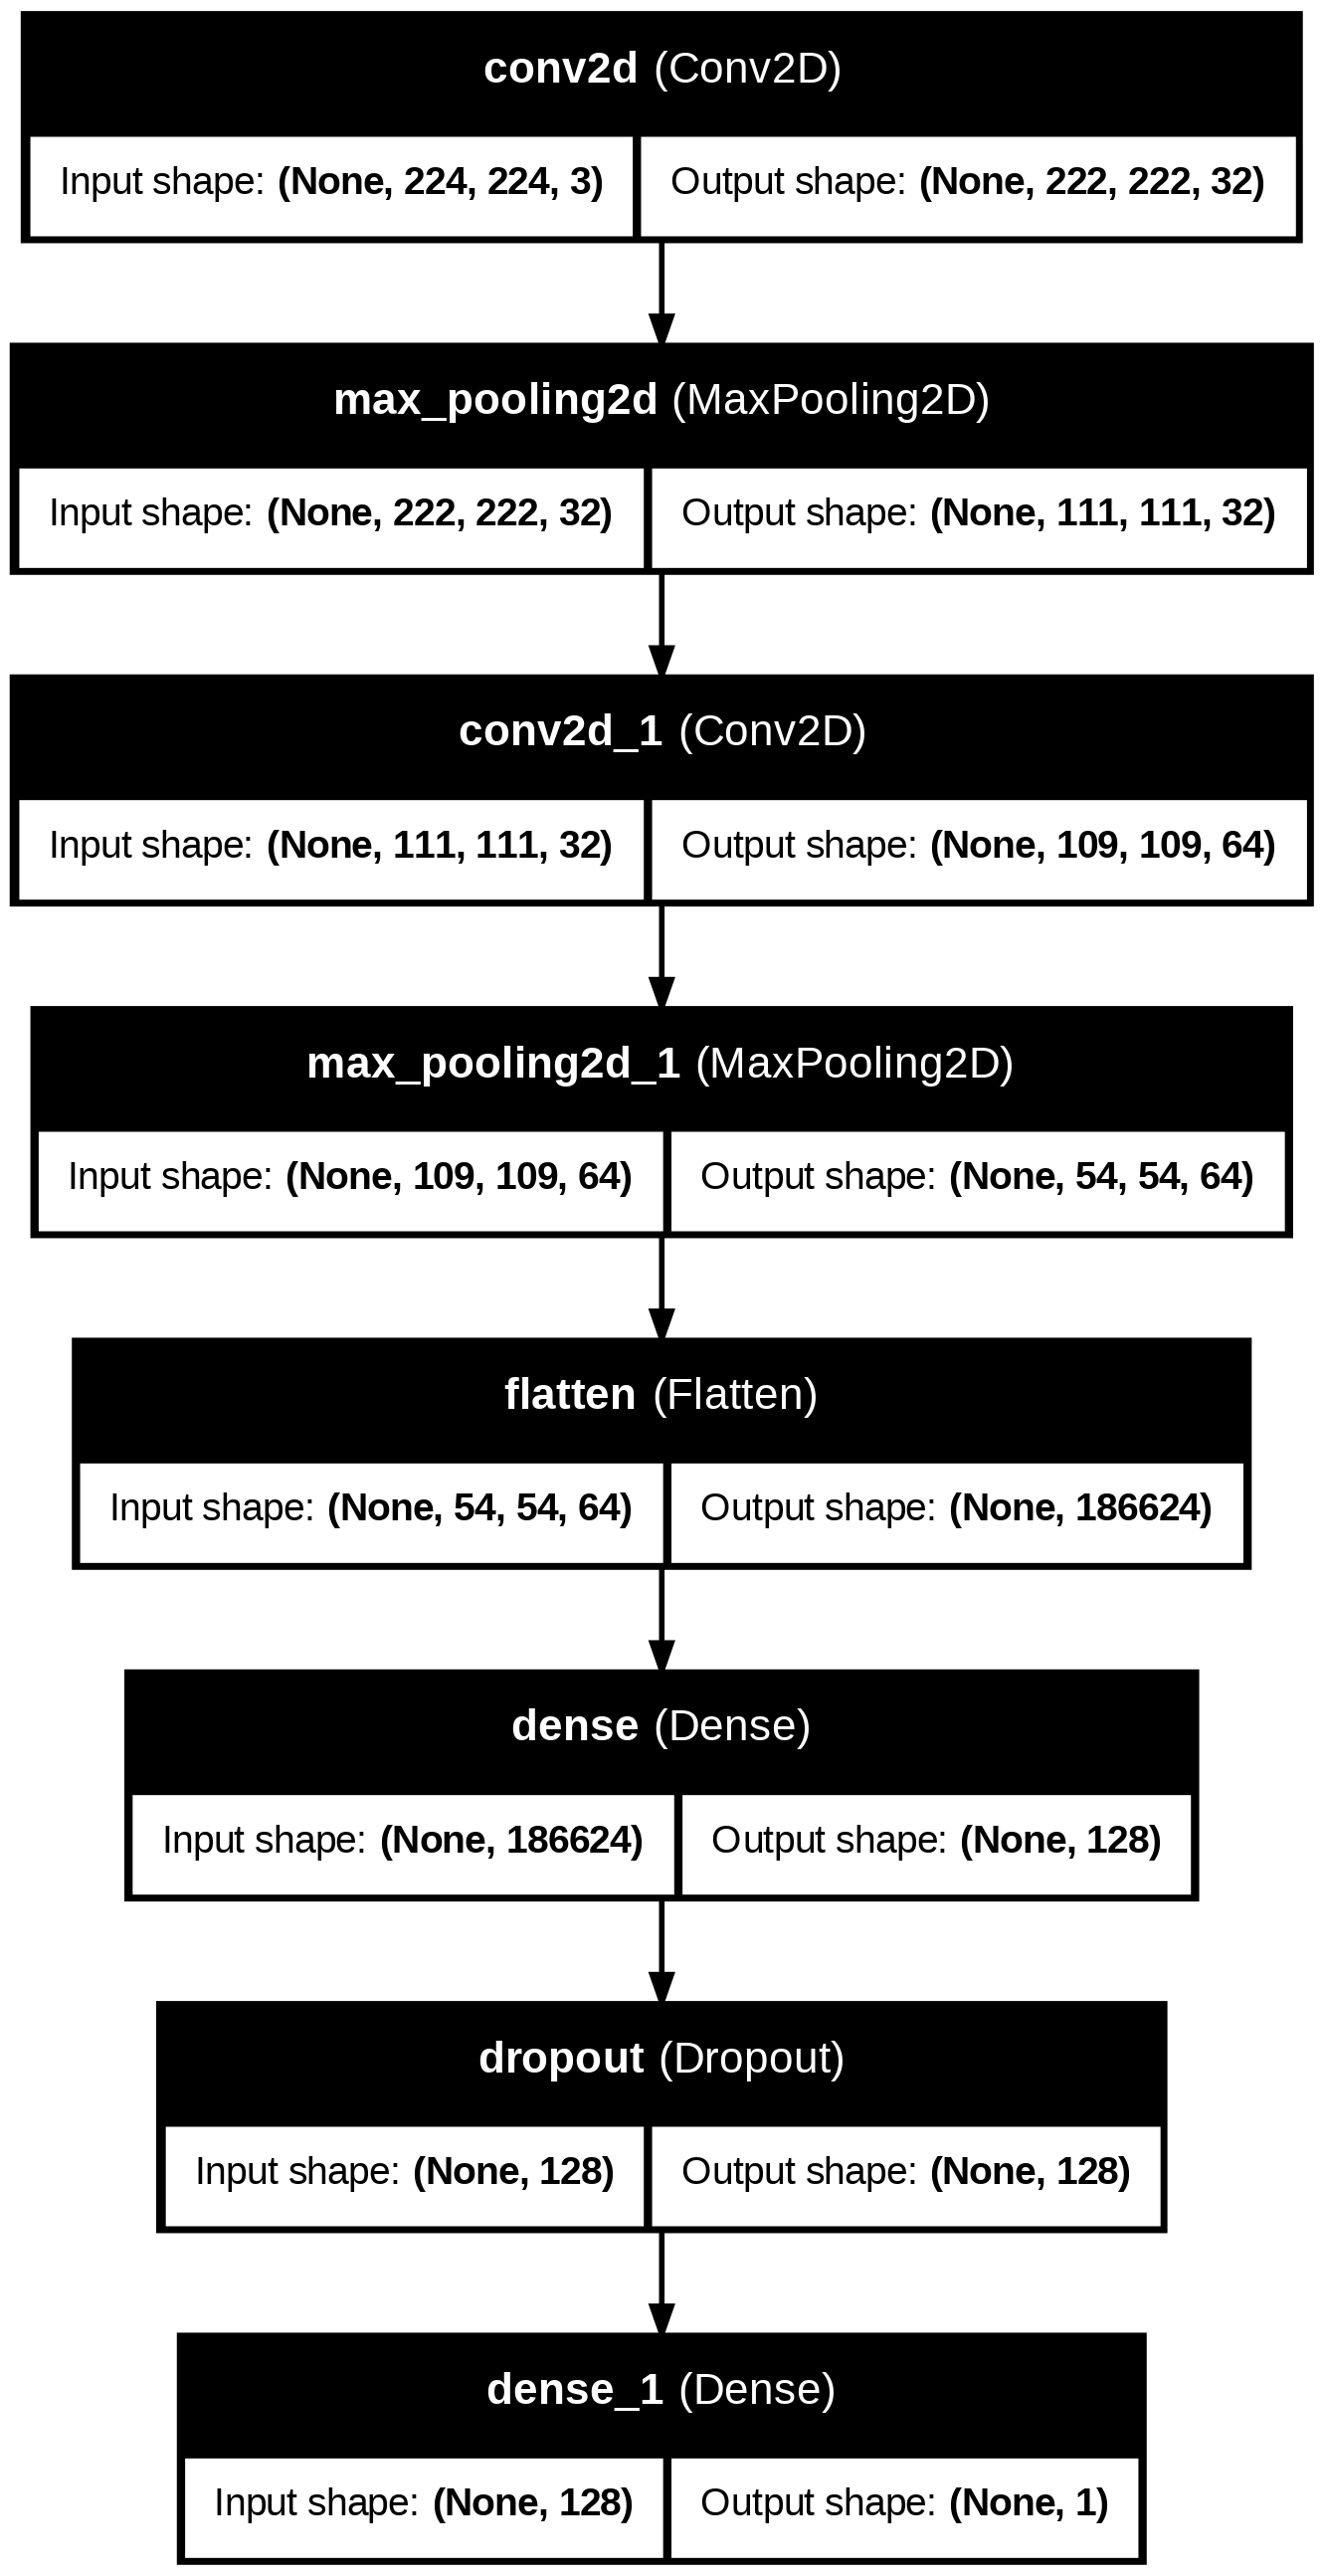

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,521 (91.20 MB)

 Trainable params: 23,907,521 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 3148s 14s/step - accuracy: 0.7769 - loss: 0.4631 - val_accuracy: 0.8039 - val_loss: 0.4026
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 139s 635ms/step - accuracy: 0.8216 - loss: 0.3811 - val_accuracy: 0.8197 - val_loss: 0.3673
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 139s 634ms/step - accuracy: 0.8368 - loss: 0.3520 - val_accuracy: 0.8311 - val_loss: 0.3343
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 141s 642ms/step - accuracy: 0.8521 - loss: 0.3323 - val_accuracy: 0.8367 - val_loss: 0.3414
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 142s 644ms/step - accuracy: 0.8528 - loss: 0.3171 - val_accuracy: 0.8413 - val_loss: 0.3351
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 148s 671ms/step - accuracy: 0.8576 - loss: 0.3020 - val_accuracy: 0.8469 - val_loss: 0.3052
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 140s 637ms/step - accuracy: 0.8628 - loss: 0.2932 - val_accuracy: 0.8379 - val_loss: 0.3242
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 140s 635ms/step - accuracy: 0.8622 - 

In [25]:
model.save("bone_cancer_model.h5")

In [26]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

28/28 ━━━━━━━━━━━━━━━━━━━━ 410s 15s/step - accuracy: 0.8985 - loss: 0.2200
Test Accuracy: 90.25%


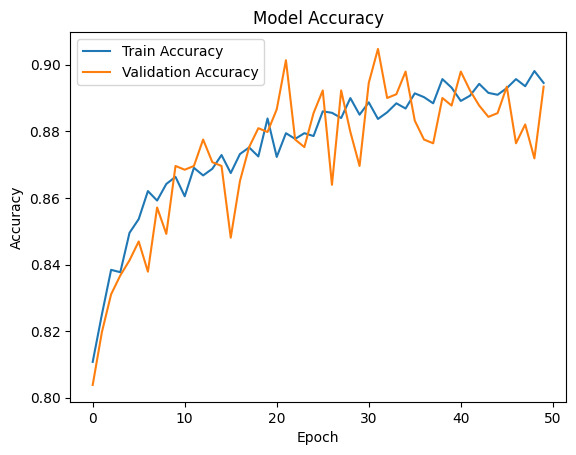

In [27]:
import matplotlib.pyplot as plt

# الدقة
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

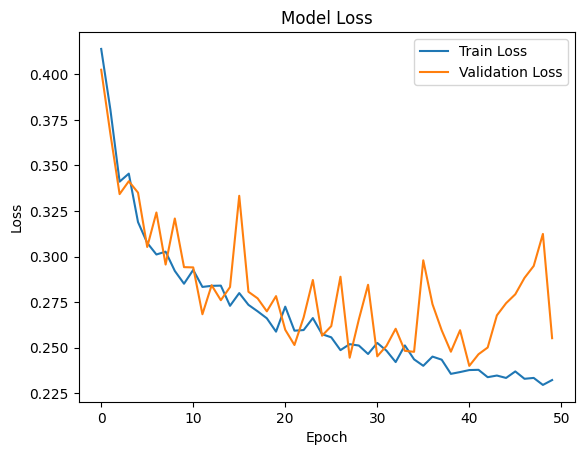

In [28]:
# الخسارة
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 548ms/step


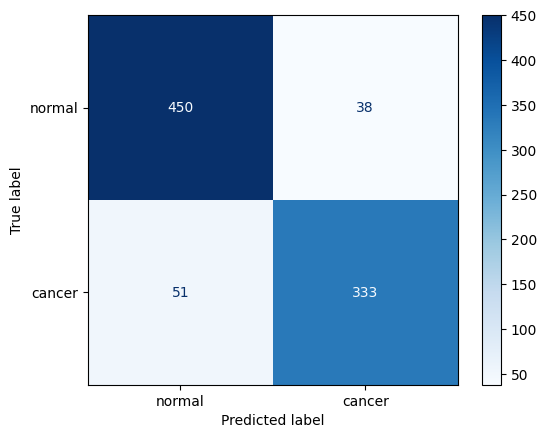

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# الحصول على التوقعات
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# رسم مصفوفة الالتباس
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'cancer'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['normal', 'cancer']))

              precision    recall  f1-score   support

      normal       0.90      0.92      0.91       488
      cancer       0.90      0.87      0.88       384

    accuracy                           0.90       872
   macro avg       0.90      0.89      0.90       872
weighted avg       0.90      0.90      0.90       872



28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 548ms/step


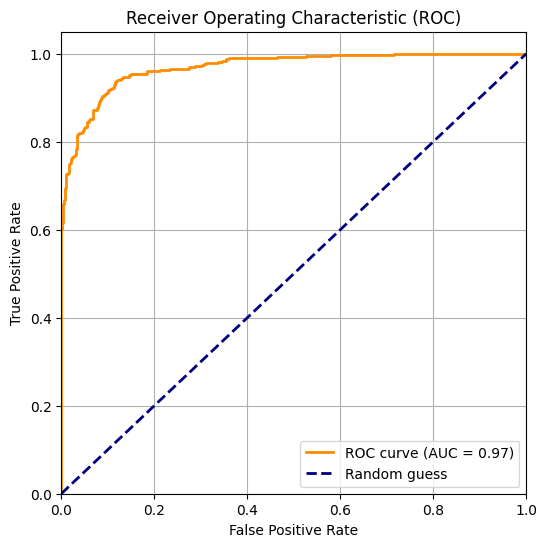

In [31]:

from sklearn.metrics import roc_curve, auc

# تأكد أنك تستخدم احتمالات وليس تنبؤات ثنائية
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator).ravel()  # احتمالات بين 0 و 1

# احسب نقاط ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# ارسم منحنى ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()